In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib.rcparams['figure, figsize'] = (12, 8)

UsageError: Line magic function `%matplotlib.rcparams['figure,` not found.


In [5]:
df = pd.read_csv("movies.csv")

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [24]:
df.shape

(7668, 16)

In [7]:
df.drop_duplicates()
df['yearcorrect'] = df['released'].astype(str)


In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980 (United States)"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980 (United States)"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980 (United States)"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980 (United States)"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980 (United States)"


In [9]:
import numpy as np

In [10]:
for col in df.columns:
    check_missing =  np.mean(df[col].isnull())
    print('{} - {}%'.format(col, check_missing))
   

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
yearcorrect - 0.0%


In [7]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name]= df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [ ]:
df_numerized.info()

In [14]:
df_numerized.median()
df.fillna(df_numerized.median(),inplace = True)

In [15]:
for col in df_numerized.columns:
    check_missing =  np.mean(df_numerized[col].isnull())
    print('{} - {}%'.format(col, check_missing))
   

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [16]:
df_numerized['budget'] = df_numerized['budget'].astype('int64')
df_numerized['gross'] = df_numerized['gross'].astype('int64')
df_numerized['runtime'] = df_numerized['runtime'].astype('int64')
df_numerized['votes'] = df_numerized['votes'].astype('int64')
df_numerized['score'] = df_numerized['score'].astype('int64')



In [17]:
df_numerized.describe()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
count,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7.668000e+03,7668.000000,7668.000000,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7668.000000,7668.000000,7668.000000
mean,3755.946531,5.137976,3.633281,2000.405451,1698.907407,5.942749,8.808694e+04,1516.120762,2292.102765,1403.862676,48.464528,3.131756e+07,7.706370e+07,1419.519953,107.259911,1699.798122
std,2164.610796,1.300140,2.759259,11.153508,993.056332,1.015715,1.632954e+05,854.409880,1307.365576,815.264518,14.884773,3.575273e+07,1.639191e+08,709.545035,18.576549,993.062743
min,0.000000,-1.000000,0.000000,1980.000000,-1.000000,1.000000,7.000000e+00,0.000000,-1.000000,-1.000000,-1.000000,3.000000e+03,3.090000e+02,-1.000000,55.000000,0.000000
25%,1889.750000,5.000000,1.000000,1991.000000,852.750000,5.000000,9.100000e+03,786.000000,1158.000000,695.000000,54.000000,1.400000e+07,4.681151e+06,786.750000,95.000000,853.000000
50%,3763.500000,5.000000,4.000000,2000.000000,1696.000000,6.000000,3.300000e+04,1519.500000,2269.000000,1373.500000,55.000000,2.050000e+07,2.020576e+07,1562.000000,104.000000,1697.000000
75%,5628.250000,6.000000,6.000000,2010.000000,2593.000000,7.000000,9.300000e+04,2272.000000,3413.000000,2136.250000,55.000000,3.200000e+07,7.262022e+07,2129.250000,116.000000,2594.250000
max,7511.000000,11.000000,18.000000,2020.000000,3413.000000,9.000000,2.400000e+06,2948.000000,4534.000000,2813.000000,58.000000,3.560000e+08,2.847246e+09,2384.000000,366.000000,3414.000000


In [18]:
df_numerized.sort_values(by = ['gross'], inplace = False, ascending = False)
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8,927000,2589,4014,1047,54,19000000,46998772,2319,146,1705
1,5573,6,1,1980,1492,5,65000,2269,1632,327,55,4500000,58853106,731,104,1492
2,5142,4,0,1980,1771,8,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1771
3,286,4,4,1980,1492,7,221000,1301,2000,2246,55,3500000,83453539,1812,88,1492
4,1027,6,4,1980,1543,7,108000,1054,521,410,55,6000000,39846344,1777,98,1543


In [19]:
pd.set_option('display.max_rows', None)


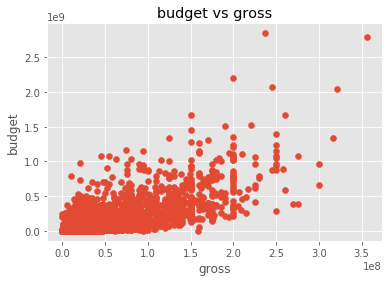

In [20]:
plt.scatter(x = df_numerized['budget'], y = df_numerized['gross'])

plt.title('budget vs gross')
plt.xlabel('gross')
plt.ylabel('budget')
plt.show()

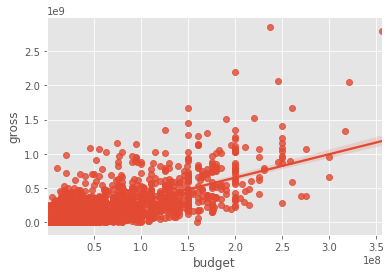

In [21]:
sns.regplot(x= 'budget', y ='gross', data = df_numerized)

In [22]:
df_numerized.corr(method ='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017825,0.013056,0.009079,0.009081,0.006472,-0.010737,0.020921,0.006601,0.009211,0.010335,-0.010480
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.003993,0.033513,0.019483,-0.005921,0.013405,0.081244,-0.108776,-0.097213,-0.032943,0.062131,0.017208
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.023595,-0.145291,-0.015258,0.006567,-0.005477,-0.037615,-0.328484,-0.233385,-0.071067,-0.052719,0.030429
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.096100,0.222573,-0.020795,-0.008656,-0.027242,-0.070938,0.291690,0.259504,-0.010431,0.120662,0.000077
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.041287,0.015959,-0.001478,-0.002404,0.015777,-0.020427,0.011120,0.000806,-0.010474,0.000990,0.998458
score,0.017825,-0.003993,0.023595,0.096100,0.041287,1.000000,0.393339,0.016695,0.020540,-0.001492,-0.125567,0.057452,0.176776,-0.000669,0.382948,0.040454
votes,0.013056,0.033513,-0.145291,0.222573,0.015959,0.393339,1.000000,0.000316,0.001039,-0.019196,0.073562,0.460968,0.632120,0.133336,0.309151,0.016016
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.016695,0.000316,1.000000,0.299067,0.039234,0.017490,-0.003584,-0.014758,0.004404,0.017611,-0.001526
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.020540,0.001039,0.299067,1.000000,0.027245,0.015343,-0.030641,-0.023064,0.005646,-0.003527,-0.002784
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001492,-0.019196,0.039234,0.027245,1.000000,-0.012998,-0.018534,-0.001529,0.012442,0.010151,0.015805


<function matplotlib.pyplot.show(*args, **kw)>

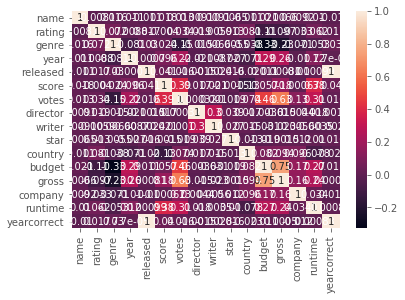

In [23]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True )
plt.show

In [8]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [9]:
sorted_pairs =corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [11]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
df['yearcorrect'] = df['released'].astype(str)
df['company']